# Триангуляция Делоне. Динамический алгоритм: удаление и вставка

### Задача

Для данной триангуляции Делоне множества точек необходимо научиться выполнять **вставку** некоторой точки в триангуляцию и **удаление** некоторой точки.

### Базовые определения

**Подразбиение Делоне множества точек** — такое разбиение выпуклой оболочки множества точек на множество выпуклых фигур, что в окружности, описанной вокруг любой из фигур, не находится никаких точек из множества.

**Триангуляция Делоне множества точек** — триангуляция, являющаяся подразбиением Делоне.

**Критерий Делоне для ребра** — на ребре можно построить такую окружность, что внутри неё не будет лежать никаких точек.

***Примечание:*** *для понимания дальнейшего материала необходимо сначала ознакомиться с базовой теорией о триангуляции Делоне, однородных координатах, а также со структурой данных DCEL.*(и тут ссылки на ноутбуки)

### Визуализация
Блок ниже запускает визуализацию удаления и вставки точки в триангуляцию.<br> 
Клик по точке в триангуляции удаляет эту точку.<br>
Клик в любом месте кроме точек из триангуляции добавляет точку места клика в триангуляцию.<br>
Измененная точка отображается желтым цветом.

<IPython.core.display.Javascript object>


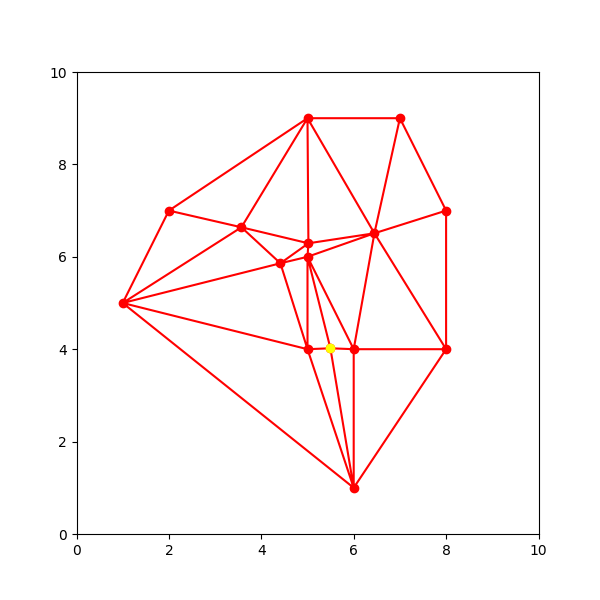

In [2]:
%matplotlib notebook
from add_del_visualize import visualize
visualize()

### Дополнительные определения и леммы для динамической триангуляции

<img src="flip.png" style="float: right; width: 180px;"/>
Будем называть **хорошими** те рёбра, для которых выполняется локальный критерий Делоне.

Рассмотрим пару смежных треугольников. Рёбра этих треугольников образуют четырёхугольник с проведённой в нём диагональю. Операция замены этой диагонали на другую называется **flip (флип)**.

На рисунке справа флип переводит красное ребро в синее.

<img src="lemma1.png" style="float: right;" />
**Лемма 1** <br>
Флип плохого ребра заменяет его хорошим.
<br>$\triangleright$<br><div style="padding-left:40px">
Докажем, что из двух рёбер, которые можно провести для пары треугольников, как минимум одно хорошее.<br>
Предположим, что это не так, то есть оба ребра (назовём их $AB$ и $CD$) плохие. Рассмотрим четырёхугольник $ACBD$ и окружность, описанную вокруг треугольника $ABC$. Точка $D$ лежит внутри этой окружности, значит, сумма углов $C$ и $D$ больше $180^{\circ}$. Аналогично доказывается, что сумма углов $A$ и $B$ больше $180^{\circ}$. Значит, сумма углов четырёхугольника $ACBD$ больше $360^{\circ}$, что невозможно.<br>
</div>$\triangleleft$

<img src="Good_edge.png" style="float: right;" />
**Лемма 2**<br>
Если в триангуляцию Делоне вставить точку в некоторый треугольник и соединить его вершины с этой точкой, то получившиеся рёбра будут хорошими.
<br>$\triangleright$<br><div style="padding-left:40px">
Предположим, точка была вставлена не на ребро. Рассмотрим любое из рёбер — пусть это будет ребро $VC$. Проведём окружность, описывающую треугольник $ABC$. По критерию Делоне в ней не будет никаких точек триангуляции. На ребре $VC$ можно построить окружность, изнутри касающуюся окружности, описанной вокруг треугольника. В ней тоже нет никаких точек. Значит, для $VC$ выполняется критерий Делоне для рёбер, значит, ребро должно принадлежать триангуляции с добавленной точкой $V$, значит, оно хорошее.
    
Случай, когда точка вставляется на ребро, рассматривается аналогично.<br>
</div>$\triangleleft$

## Алгоритм вставки

### Вставка точки, лежащей внутри триангуляции

#### Алгоритм
1. Определяем, в каком фейсе (или на каком ребре) лежит точка. Для этого используем алгоритм локализации (ссылка)
2. Делаем один из следующих шагов в зависимости от положения точки:
   1. Если точка лежит внутри фейса, добавляем три ребра, сам фейс превращаем в один из новых смежных с вставляемой точкой и добавялем ещё два фейса.
   2. Если точка лежит на ребре, два смежных с ребром фейса превращаем в два новых, добавляем ещё два, а так же превращаем ребро, на которое вставляется точка, в ребро, которое заканчивается в этой точке, и вставляем три новых.
3. Плохие ребра с помощью флипов заменяем на хорошие.

**Заметим**, что все добавленные в пункте 2 ребра по **лемме 2** являются хорошими. Плохими могут стать ребра противолежащие вставленной точке.

#### Пример <br>
| [![First](first.png)](first)  | [![Second](second.png)](second) | [![Third](third.png)](third) |
|:---:|:---:|:---:|
| Триангуляция до выполниения вставки | Состояние после второго шага (зеленые ребра появились, синие ребра стали плохими)| Триангуляция после третьего шага |

#### Вставка точки, находящейся вне триангуляции

Представим, что вне триангуляции — бесконечные треугольники, основания которых — рёбра выпуклой оболочки триангуляции, а противолежащая ребру вершина — это бесконечно удалённая точка. Тогда понятно, что вставка точки, не лежащей в триангуляции, сведётся к вставке точки внутрь триангуляции, если мы научимся обрабатывать бесконечные фейсы.

Бесконечно удалённая точка имеет координаты $(0,0,1,0)$ (последняя координата — однородная).

Тогда проверка на то, является ли хорошим ребро, инцидентное бесконечно удалённой точке, упрощается:
$
\begin{vmatrix}
a_x & a_y & a_x^2 + a_y^2 & 1 \\
b_x & b_y & b_y^2 + b_y^2 & 1 \\
c_x & c_y & c_x^2 + c_y^2 & 1 \\
0   & 0   & 1             & 0
\end{vmatrix} = \begin{vmatrix}
a_x & a_y & 1 \\
b_x & b_y & 1 \\
c_x & c_y & 1
\end{vmatrix}
$, то есть достаточно проверить поворот трёх остальных точек образованного двумя бесконечными треугольниками четырёхугольника.

Проверка, принадлежит ли точка бесконечному треугольнику, тоже проста: нужно, чтобы из точки было видно ребро, противолежащее бесконечно удалённой точке, в бесконечном треугольнике. Это проверяется предикатом поворота.

## Удаление

### Замечания по реализации

### Реализация

### Отработка практических навыков

### Время работы

#### Вставка

**Лемма 3** <br>
При вставке точки будут флипаться только рёбра, противолежащие вставленной точке.
<br>$\triangleright$<br><div style="padding-left:40px">
Доказательство по индукции.

База. По **лемме 2** изначально не будут флипаться новые рёбра, инцидентные точке, то есть плохими могут оказаться только рёбра, противолежащие точке.

Переход. Рассмотрим, что произойдёт с противолежащим точке $V$ ребром $AC$ после флипа, если оно плохое. До вставки точки $V$ для триангуляции выполнялся глобальный критерий Делоне, поэтому в окружности, описанной вокруг треугольника $ACD$, не будет лежать никаких точек, кроме точки $V$. Можно построить окружность, касающуюся её изнутри в точке $D$ и проходящую через точку $V$. В ней тоже не окажется никаких точек, так как она касается изнутри. Значит, для ребра $VD$ выполняется критерий Делоне. Значит, после флипа ребро $AC$ уже не будет флипаться. Так как для рёбер $AV$ и $CV$ выполняется критерий Делоне, то плохими после флипа могут стать только рёбра $AD$ и $CD$ — то есть рёбра, противолежащие точке $V$.
</div>$\triangleleft$

| [![Lemma3](lemma3.png)](lemma3)|
|::|
|$V$ — вставленная точка, ребро $AC$ — плохое|


**Лемма 4** <br>
Средняя степень вершины после вставки её в триангуляцию Делоне равна $O(1)$.
<br>$\triangleright$<br><div style="padding-left:40px">
Предположим, что мы вставляем $i+1$-ую точку из последовательности из $n$ точек. Рассмотрим все перестановки из этих $i+1$ точек, означающие порядок вставки этих точек. Всего таких перестановок $(i+1)!$. Тогда средняя степень последней вершины среди перестановок равна:

$E(\operatorname{deg}(v_{i+1}))=\frac {\sum_{p=perm(v_1, v_2, ..., v_{i+1})} \operatorname{deg} (p[i+1])} {(i+1)!}$

Каждая из $i+1$ вершин побывает последней ровно $i!$ раз, поэтому:

$E(\operatorname{deg} (v_{i+1}))=\frac {\sum_{k=0}^{i} i! \operatorname{deg} (v_k)} {(i+1)!} = \frac {\sum_{k=0}^i \operatorname{deg}(v_k)} {i+1} = \frac {O(i+1)} {i+1} = O(1)$
<br></div>$\triangleleft$

**Теорема** <br>
При вставке точки в триангуляцию Делоне в среднем придётся сделать $O(1)$ флипов.
<br>$\triangleright$<br><div style="padding-left:40px">
Все флипнутые рёбра окажутся инцидентными вставленной точке (**по лемме 8**), а степень вершины — $O(1)$ (**по лемме 9**). Поэтому будет сделано $O(1)$ флипов.
<br></div>$\triangleleft$


**Замечание**<br>
Так как среднее число флипов — $O(1)$, то время вставки целиком зависит от времени локализации.

#### Удаление

Средняя степень вершины в триангуляции — $O(1)$, поэтому триангуляция звёздного многоугольника будет тоже за $O(1)$. Новых рёбер получится $O(1)$, проверить их на локальный критерий Делоне и пофлипать тоже можно за $O(1)$. Итого удаление точки работает за $O(1)$.